# libraries

In [1075]:
# Packages for EDA 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re 

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;


In [1076]:
df = pd.read_csv("./data/train.csv",low_memory=False)
df.head(5)

,ID,Customer_ID,Month,Name,Age,Number,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x522a,CUS_0x2dbf,May,Abhishek Vishnoiw,51,370-51-2390,Musician,101583.48,NaN,5,...,Standard,50.93,34.462154,24 Years and 1 Months,No,190.811017,630.0157894388726,Low_spent_Large_value_payments,314.0021934422197,Standard
1,0x6091,CUS_0x8167,August,Freifeldu,23,721-85-0529,Writer,101926.95,8635.9125,4,...,_,1058,39.693812,20 Years and 5 Months,No,70.587681,662.8039273360225,Low_spent_Medium_value_payments,410.1996419555151,Standard
2,0xcb5f,CUS_0x3a0b,February,NaN,49,618-96-2558,Writer,158871.12,NaN,0,...,Good,576.48,39.367225,19 Years and 0 Months,No,86.905860,746.8059854204569,Low_spent_Medium_value_payments,742.5141542054829,Standard
3,0x17dbc,CUS_0x9a4b,March,Alex Dobuzinskiso,40,817-31-4270,Doctor,60379.28,NaN,5,...,Standard,725.39,29.061701,17 Years and 1 Months,NM,90.906385,166.41865803064803,High_spent_Medium_value_payments,473.13562343490486,Standard
4,0x225b3,CUS_0x253a,June,NaN,17,580-53-4920,Accountant,50050.83,4085.9025,9,...,Bad,3419.1,30.386321,4 Years and 6 Months,Yes,190.445060,56.789441169542684,High_spent_Large_value_payments,401.3557486786916,Poor


In [1077]:
df.shape

(80000, 28)

In [1078]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      71971 non-null  object 
 4   Age                       80000 non-null  object 
 5   Number                    80000 non-null  object 
 6   Profession                80000 non-null  object 
 7   Income_Annual             80000 non-null  object 
 8   Base_Salary_PerMonth      67968 non-null  float64
 9   Total_Bank_Accounts       80000 non-null  int64  
 10  Total_Credit_Cards        80000 non-null  int64  
 11  Rate_Of_Interest          80000 non-null  int64  
 12  Total_Current_Loans       80000 non-null  object 
 13  Loan_Type                 70843 non-null  object 
 14  Delay_

In [1079]:
df.duplicated().sum()

np.int64(0)

In [1080]:
# The columns ID, Cust_ID, Number, Name are not useful are the categorization

df.drop(["ID","Name","Number"],axis=1, inplace=True)

In [1081]:
df.head()

,Customer_ID,Month,Age,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x2dbf,May,51,Musician,101583.48,NaN,5,7,10,4_,...,Standard,50.93,34.462154,24 Years and 1 Months,No,190.811017,630.0157894388726,Low_spent_Large_value_payments,314.0021934422197,Standard
1,CUS_0x8167,August,23,Writer,101926.95,8635.9125,4,4,9,1,...,_,1058,39.693812,20 Years and 5 Months,No,70.587681,662.8039273360225,Low_spent_Medium_value_payments,410.1996419555151,Standard
2,CUS_0x3a0b,February,49,Writer,158871.12,NaN,0,4,8,1,...,Good,576.48,39.367225,19 Years and 0 Months,No,86.905860,746.8059854204569,Low_spent_Medium_value_payments,742.5141542054829,Standard
3,CUS_0x9a4b,March,40,Doctor,60379.28,NaN,5,6,18,3,...,Standard,725.39,29.061701,17 Years and 1 Months,NM,90.906385,166.41865803064803,High_spent_Medium_value_payments,473.13562343490486,Standard
4,CUS_0x253a,June,17,Accountant,50050.83,4085.9025,9,10,20,5,...,Bad,3419.1,30.386321,4 Years and 6 Months,Yes,190.445060,56.789441169542684,High_spent_Large_value_payments,401.3557486786916,Poor


In [1082]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Month                     80000 non-null  object 
 2   Age                       80000 non-null  object 
 3   Profession                80000 non-null  object 
 4   Income_Annual             80000 non-null  object 
 5   Base_Salary_PerMonth      67968 non-null  float64
 6   Total_Bank_Accounts       80000 non-null  int64  
 7   Total_Credit_Cards        80000 non-null  int64  
 8   Rate_Of_Interest          80000 non-null  int64  
 9   Total_Current_Loans       80000 non-null  object 
 10  Loan_Type                 70843 non-null  object 
 11  Delay_from_due_date       80000 non-null  int64  
 12  Total_Delayed_Payments    74405 non-null  object 
 13  Credit_Limit              80000 non-null  object 
 14  Total_

In [1083]:
# Define columns to convert to numeric based on your updated list
N_to_fix = [
    'Age', 'Income_Annual', 'Total_Current_Loans', 'Total_Delayed_Payments', 
    'Monthly_Investment', 'Credit_Limit', 'Current_Debt_Outstanding', 'Monthly_Balance'
]

# Convert each column to numeric with coercion for errors, filling NaNs with 0
for col in N_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(float)

In [1084]:
# fig,axis=plt.subplots(nrows=4,ncols=2,figsize=(12,10))
# k=axis.flatten()
# for i,p in zip(N_to_fix,k):
#     sns.histplot(x=df[i],ax=p,kde=True)
#     p.set_title(f"histogram of {i}")
#     p.set_xlabel(i)
#     p.set_ylabel("frequency")
# plt.tight_layout()
# plt.show()

# Clean Columns

### 1.Age

In [1085]:
# Check summary of 'Age' column
df['Age'].describe()

# Check for any rows with negative or unrealistic age values
df[df['Age'] < 0]


,Customer_ID,Month,Age,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
49,CUS_0x5856,August,-500.0,Teacher,6.163040e+04,5075.866667,5,7,3,3.0,...,_,1274.09,31.690432,NaN,NM,128.621579,111.656541,High_spent_Medium_value_payments,517.308547,Poor
121,CUS_0x104a,February,-500.0,Mechanic,1.498139e+04,1461.449167,2,7,5,4.0,...,Good,1122.46,35.501518,31 Years and 9 Months,No,38.115968,19.741590,High_spent_Medium_value_payments,338.287359,Standard
422,CUS_0x990,January,-500.0,Developer,1.893761e+04,1536.134167,8,8,28,6.0,...,_,1306.30,23.994249,14 Years and 10 Months,Yes,80.208365,157.909508,Low_spent_Small_value_payments,205.495544,Poor
453,CUS_0x43cf,February,-500.0,Scientist,3.447482e+04,3050.901667,10,7,21,6.0,...,_,3374.26,27.454636,NaN,Yes,143.581017,208.732739,Low_spent_Small_value_payments,242.776411,Standard
643,CUS_0x86b,April,-500.0,Engineer,6.969216e+04,6034.680000,9,5,32,7.0,...,Bad,2128.87,26.751249,13 Years and 0 Months,Yes,395.879393,0.000000,High_spent_Medium_value_payments,258.130618,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79237,CUS_0x79bf,July,-500.0,Journalist,9.533995e+03,797.499583,9,5,25,8.0,...,_,2579.10,31.091404,7 Years and 10 Months,Yes,61.366428,63.095392,Low_spent_Small_value_payments,245.288139,Standard
79466,CUS_0x3ee4,May,-500.0,Doctor,1.998293e+04,1651.244167,3,4,11,0.0,...,_,504.15,25.923058,33 Years and 3 Months,NM,0.000000,0.000000,Low_spent_Small_value_payments,234.228439,Standard
79482,CUS_0x68df,August,-500.0,Developer,2.042248e+04,1442.873333,5,7,5,0.0,...,Standard,1420.58,33.427510,32 Years and 8 Months,Yes,0.000000,33.646331,High_spent_Small_value_payments,370.641002,Good
79655,CUS_0x183e,May,-500.0,Scientist,1.242387e+07,1872.293333,8,5,19,8.0,...,Bad,2571.56,34.290360,1 Years and 2 Months,NM,105.277684,130.333605,!@9#%8,211.618045,Standard


In [1086]:
# Removing rows with invalid negative age values:
df = df[df['Age'] >= 0]


In [1087]:
df['Age'].describe()

count    79299.000000
mean       111.164517
std        675.872001
min          0.000000
25%         23.000000
50%         32.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [1088]:
# Can't have credit card below 18
# Remove rows where 'Age' is below 18
df = df[df['Age'] >= 18]


In [1089]:
df['Age'].describe()

count    70980.000000
mean       123.240124
std        713.403648
min         18.000000
25%         26.000000
50%         34.000000
75%         43.000000
max       8698.000000
Name: Age, dtype: float64

In [1090]:
# Remove rows where Age is greater than 122(highest age person)
df = df[df['Age'] <= 122]

df['Age'].describe()

count    69544.000000
mean        34.423027
std         10.144150
min         18.000000
25%         26.000000
50%         34.000000
75%         42.000000
max        118.000000
Name: Age, dtype: float64

In [1091]:
df['Age'].isna().sum()

np.int64(0)

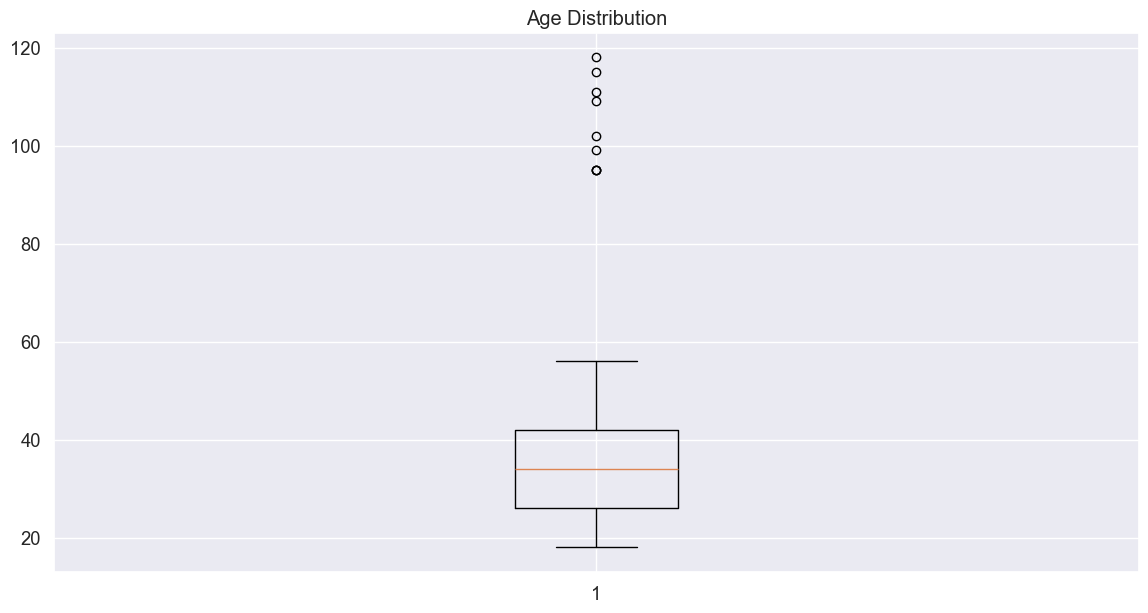

In [1092]:
# Visualize age distribution to check for outliers
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.title("Age Distribution")
plt.show()


# Income Annual Column

In [1093]:
df['Income_Annual'].describe()

count    6.954400e+04
mean     1.671883e+05
std      1.401024e+06
min      0.000000e+00
25%      1.757432e+04
50%      3.510432e+04
75%      7.117015e+04
max      2.419806e+07
Name: Income_Annual, dtype: float64

In [1094]:
df['Income_Annual'].isna().sum()

np.int64(0)

In [1095]:
# Ensure that Income_Annual is numeric, coercing any errors to NaN
df['Income_Annual'] = pd.to_numeric(df['Income_Annual'], errors='coerce')
# Fill any NaN values that were generated
df['Income_Annual'] = df['Income_Annual'].fillna(df['Income_Annual'].median())


# Month

In [1096]:
df['Month'].unique()

# No invalid months so its clean

array(['May', 'August', 'February', 'March', 'June', 'July', 'April',
       'January'], dtype=object)

# Profession

In [1097]:
df['Profession'].unique()

array(['Musician', 'Writer', 'Doctor', '_______', 'Engineer', 'Manager',
       'Media_Manager', 'Teacher', 'Developer', 'Architect', 'Mechanic',
       'Lawyer', 'Accountant', 'Entrepreneur', 'Scientist', 'Journalist'],
      dtype=object)

In [1098]:
# Replace '_______' in the 'Profession' column with NaN
df['Profession'] = df['Profession'].replace('_______', pd.NA)


In [1099]:
df['Profession'].isna().sum()

np.int64(4963)

In [1100]:
df['Profession'].fillna('Unknown', inplace=True)


C:\Users\akash\AppData\Local\Temp\ipykernel_14644\4082928227.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profession'].fillna('Unknown', inplace=True)


# Base_Salary_PerMonth Column

In [1101]:
df

,Customer_ID,Month,Age,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x2dbf,May,51.0,Musician,101583.480,NaN,5,7,10,0.0,...,Standard,50.93,34.462154,24 Years and 1 Months,No,190.811017,630.015789,Low_spent_Large_value_payments,314.002193,Standard
1,CUS_0x8167,August,23.0,Writer,101926.950,8635.912500,4,4,9,1.0,...,_,1058.00,39.693812,20 Years and 5 Months,No,70.587681,662.803927,Low_spent_Medium_value_payments,410.199642,Standard
2,CUS_0x3a0b,February,49.0,Writer,158871.120,NaN,0,4,8,1.0,...,Good,576.48,39.367225,19 Years and 0 Months,No,86.905860,746.805985,Low_spent_Medium_value_payments,742.514154,Standard
3,CUS_0x9a4b,March,40.0,Doctor,60379.280,NaN,5,6,18,3.0,...,Standard,725.39,29.061701,17 Years and 1 Months,NM,90.906385,166.418658,High_spent_Medium_value_payments,473.135623,Standard
5,CUS_0x318e,March,33.0,Unknown,17488.905,1643.408750,5,6,20,3.0,...,Standard,1169.13,38.405722,NaN,No,31.874662,134.323739,Low_spent_Large_value_payments,268.142475,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,CUS_0x21f4,August,55.0,Doctor,114597.040,NaN,7,6,4,4.0,...,Good,926.18,26.436313,31 Years and 9 Months,No,225.923762,327.619668,High_spent_Medium_value_payments,633.131903,Poor
79996,CUS_0x68a8,July,28.0,Entrepreneur,0.000,656.654583,6,8,31,-100.0,...,_,2695.38,24.127401,11 Years and 8 Months,NM,7352.000000,49.544158,Low_spent_Medium_value_payments,268.108435,Poor
79997,CUS_0xc52a,August,46.0,Writer,35032.660,2853.388333,10,6,33,7.0,...,Bad,1789.00,25.086176,11 Years and 5 Months,Yes,150.500097,106.735679,Low_spent_Small_value_payments,318.103057,Poor
79998,CUS_0xa955,May,42.0,Mechanic,129680.280,10643.690000,8,3,5,2.0,...,_,240.27,33.944094,20 Years and 5 Months,NM,114.165609,567.179873,High_spent_Small_value_payments,643.023518,Standard


In [1102]:
df['Base_Salary_PerMonth'].describe()

count    59092.000000
mean      4250.907160
std       3215.833194
min        303.645417
25%       1645.032917
50%       3129.883333
75%       6055.230000
max      15204.633333
Name: Base_Salary_PerMonth, dtype: float64

In [1103]:
df['Base_Salary_PerMonth'].isna().sum()

np.int64(10452)

In [1104]:
# fills missing salaries based on the median salary within each profession
df['Base_Salary_PerMonth'] = df.groupby('Profession')['Base_Salary_PerMonth'].transform(lambda x: x.fillna(x.median()))


In [1105]:
df

,Customer_ID,Month,Age,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x2dbf,May,51.0,Musician,101583.480,3156.645000,5,7,10,0.0,...,Standard,50.93,34.462154,24 Years and 1 Months,No,190.811017,630.015789,Low_spent_Large_value_payments,314.002193,Standard
1,CUS_0x8167,August,23.0,Writer,101926.950,8635.912500,4,4,9,1.0,...,_,1058.00,39.693812,20 Years and 5 Months,No,70.587681,662.803927,Low_spent_Medium_value_payments,410.199642,Standard
2,CUS_0x3a0b,February,49.0,Writer,158871.120,3241.939167,0,4,8,1.0,...,Good,576.48,39.367225,19 Years and 0 Months,No,86.905860,746.805985,Low_spent_Medium_value_payments,742.514154,Standard
3,CUS_0x9a4b,March,40.0,Doctor,60379.280,2975.912500,5,6,18,3.0,...,Standard,725.39,29.061701,17 Years and 1 Months,NM,90.906385,166.418658,High_spent_Medium_value_payments,473.135623,Standard
5,CUS_0x318e,March,33.0,Unknown,17488.905,1643.408750,5,6,20,3.0,...,Standard,1169.13,38.405722,NaN,No,31.874662,134.323739,Low_spent_Large_value_payments,268.142475,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,CUS_0x21f4,August,55.0,Doctor,114597.040,2975.912500,7,6,4,4.0,...,Good,926.18,26.436313,31 Years and 9 Months,No,225.923762,327.619668,High_spent_Medium_value_payments,633.131903,Poor
79996,CUS_0x68a8,July,28.0,Entrepreneur,0.000,656.654583,6,8,31,-100.0,...,_,2695.38,24.127401,11 Years and 8 Months,NM,7352.000000,49.544158,Low_spent_Medium_value_payments,268.108435,Poor
79997,CUS_0xc52a,August,46.0,Writer,35032.660,2853.388333,10,6,33,7.0,...,Bad,1789.00,25.086176,11 Years and 5 Months,Yes,150.500097,106.735679,Low_spent_Small_value_payments,318.103057,Poor
79998,CUS_0xa955,May,42.0,Mechanic,129680.280,10643.690000,8,3,5,2.0,...,_,240.27,33.944094,20 Years and 5 Months,NM,114.165609,567.179873,High_spent_Small_value_payments,643.023518,Standard


# Total_Bank_Accounts Column

In [1106]:
df['Total_Bank_Accounts'].describe()

count    69544.000000
mean        17.358766
std        119.169394
min         -1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max       1798.000000
Name: Total_Bank_Accounts, dtype: float64

In [1107]:
# Replace negative values with zero
df['Total_Bank_Accounts'] = df['Total_Bank_Accounts'].apply(lambda x: 0 if x < 0 else x)


In [1108]:
# Calculate the 98th percentile value (99th percentile gives max 483, which doesn't make sense)
cap_value = df['Total_Bank_Accounts'].quantile(0.98)

# Cap values above this threshold
df['Total_Bank_Accounts'] = df['Total_Bank_Accounts'].apply(lambda x: cap_value if x > cap_value else x)


In [1109]:
df.Total_Bank_Accounts.describe()

count    69544.000000
mean         5.351058
std          2.640017
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Total_Bank_Accounts, dtype: float64

# Total_Credit_Cards

In [1110]:
df.Total_Credit_Cards.describe()

count    69544.000000
mean        22.113453
std        127.965998
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1498.000000
Name: Total_Credit_Cards, dtype: float64

In [1111]:
#Replace negative values with 0, if any
df['Total_Credit_Cards'] = df['Total_Credit_Cards'].apply(lambda x: 0 if x < 0 else x)


In [1112]:
#Cap outliers to the 95th percentile
credit_card_cap = df['Total_Credit_Cards'].quantile(0.95)
df['Total_Credit_Cards'] = df['Total_Credit_Cards'].apply(lambda x: credit_card_cap if x > credit_card_cap else x)

In [1113]:
df.Total_Credit_Cards.describe()

count    69544.000000
mean         5.578612
std          2.140185
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Total_Credit_Cards, dtype: float64

# Rate_Of_Interest

In [1114]:
df['Rate_Of_Interest'].describe()


count    69544.000000
mean        72.457308
std        468.938976
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max       5797.000000
Name: Rate_Of_Interest, dtype: float64

In [1115]:
# Get the 95th percentile value
roi_98th_percentile = df['Rate_Of_Interest'].quantile(0.95)

# Cap the values at the 98th percentile
df['Rate_Of_Interest'] = df['Rate_Of_Interest'].apply(lambda x: roi_98th_percentile if x > roi_98th_percentile else x)


In [1116]:
df['Rate_Of_Interest'].describe()


count    69544.000000
mean        14.517989
std          8.840169
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         32.000000
Name: Rate_Of_Interest, dtype: float64

In [1117]:
df['Rate_Of_Interest'].isna().sum()

np.int64(0)

# Total_Current_Loans

In [1118]:
df['Total_Current_Loans'].describe()


count    69544.000000
mean         2.709191
std         62.600481
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Total_Current_Loans, dtype: float64

In [1119]:
df['Total_Current_Loans'] = df['Total_Current_Loans'].apply(lambda x: 0 if x < 0 else x)

In [1120]:
# Calculate the 98th percentile of the column
loan_98th_percentile = df['Total_Current_Loans'].quantile(0.99)

In [1121]:
# Cap the values above the 98th percentile to this value
df['Total_Current_Loans'] = df['Total_Current_Loans'].apply(lambda x: loan_98th_percentile if x > loan_98th_percentile else x)

In [1122]:
df['Total_Current_Loans'].describe()


count    69544.000000
mean         3.164543
std          2.540324
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Total_Current_Loans, dtype: float64

# Loan_Type

In [1123]:
df.drop(columns=['Loan_Type'], inplace=True)


# Delay_from_due_date

In [1124]:
df['Delay_from_due_date'].describe()

count    69544.000000
mean        20.606451
std         14.673892
min         -5.000000
25%         10.000000
50%         17.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [1125]:
df[df['Delay_from_due_date']<0]

,Customer_ID,Month,Age,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
12,CUS_0x424c,August,22.0,Developer,92599.26,3024.985000,0.0,3.0,3.0,0.0,...,Good,454.40,39.614095,NaN,NM,0.000000,458.948063,Low_spent_Large_value_payments,605.312437,Standard
464,CUS_0x435a,May,52.0,Architect,42103.18,3327.598333,4.0,2.0,12.0,2.0,...,_,725.53,31.000286,31 Years and 11 Months,No,42.468579,216.205477,Low_spent_Small_value_payments,364.085778,Good
623,CUS_0x7d66,July,47.0,Journalist,39459.88,3530.323333,4.0,2.0,1.0,2.0,...,Good,1253.88,33.237468,24 Years and 9 Months,No,50.772299,139.670794,High_spent_Medium_value_payments,412.589240,Good
1262,CUS_0xa22b,April,22.0,Journalist,88062.28,7411.523333,4.0,3.0,1.0,0.0,...,Good,404.44,37.935841,32 Years and 5 Months,No,0.000000,247.511759,High_spent_Small_value_payments,753.640574,Standard
1674,CUS_0x5be5,April,52.0,Mechanic,150339.96,12614.330000,1.0,2.0,10.0,0.0,...,Good,674.60,41.570598,22 Years and 7 Months,No,219.481295,338.955519,High_spent_Medium_value_payments,952.996186,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78740,CUS_0x4fe9,May,23.0,Doctor,128066.44,10394.203333,4.0,6.0,6.0,4.0,...,Good,1004.44,29.490599,19 Years and 3 Months,NM,366.397466,129.749861,High_spent_Large_value_payments,783.273006,Poor
78816,CUS_0xb48d,April,49.0,Mechanic,0.00,1659.429583,3.0,2.0,1.0,2.0,...,Good,1140.51,30.697251,17 Years and 8 Months,No,20.760294,137.902475,Low_spent_Small_value_payments,297.280189,Good
79019,CUS_0x18d4,May,26.0,Teacher,74264.92,6137.743333,4.0,10.0,4.0,0.0,...,Good,307.82,34.533311,25 Years and 3 Months,No,129.224927,145.355118,High_spent_Large_value_payments,579.194288,Good
79587,CUS_0x5217,March,20.0,Lawyer,14337.64,1405.803333,0.0,4.0,1.0,0.0,...,_,207.85,28.643472,NaN,No,19.503732,185.887777,Low_spent_Small_value_payments,225.188824,Good


In [1126]:
#Remove negative values
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: x if x >= 0 else None)

In [1127]:
df['Delay_from_due_date'].describe()


count    69096.000000
mean        20.754298
std         14.605380
min          0.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [1128]:
df['Delay_from_due_date'].isna().sum()

np.int64(448)

In [1129]:
#Fill NaN values (you can fill with 0 if you consider no delayed payments as the default)
df['Total_Delayed_Payments'].fillna(0, inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_14644\4038741646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Delayed_Payments'].fillna(0, inplace=True)


In [1130]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Profession', 'Income_Annual',
       'Base_Salary_PerMonth', 'Total_Bank_Accounts', 'Total_Credit_Cards',
       'Rate_Of_Interest', 'Total_Current_Loans', 'Delay_from_due_date',
       'Total_Delayed_Payments', 'Credit_Limit', 'Total_Credit_Enquiries',
       'Credit_Mix', 'Current_Debt_Outstanding', 'Ratio_Credit_Utilization',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Per_Month_EMI',
       'Monthly_Investment', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# Total_Delayed_Payments

In [1131]:
df['Total_Delayed_Payments'].describe()

count    69544.000000
mean        28.224462
std        219.227340
min         -3.000000
25%          7.000000
50%         12.000000
75%         18.000000
max       4397.000000
Name: Total_Delayed_Payments, dtype: float64

In [1132]:
#Remove negative values
df['Total_Delayed_Payments'] = df['Total_Delayed_Payments'].apply(lambda x: x if x >= 0 else None)

In [1133]:
# Fill NaN values with 0, as no delayed payments can be treated as zero
df['Total_Delayed_Payments'].fillna(0, inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_14644\2959729115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Delayed_Payments'].fillna(0, inplace=True)


In [1134]:
# Cap extreme outliers to the 95th percentile
# Calculate the 95th percentile to determine the cap value
cap_value = df['Total_Delayed_Payments'].quantile(0.99)

# Cap the values that exceed the 95th percentile
df['Total_Delayed_Payments'] = df['Total_Delayed_Payments'].apply(lambda x: cap_value if x > cap_value else x)

In [1135]:
df['Total_Delayed_Payments'].describe()


count    69544.000000
mean        11.928089
std          7.233423
min          0.000000
25%          7.000000
50%         12.000000
75%         18.000000
max         27.000000
Name: Total_Delayed_Payments, dtype: float64

# Credit_Limit

In [1139]:
df['Credit_Limit'].describe()

count    69544.000000
mean         9.985530
std          6.829928
min         -6.450000
25%          4.860000
50%          9.090000
75%         14.220000
max         36.970000
Name: Credit_Limit, dtype: float64

In [1140]:
#Replace negative values with NaN
df['Credit_Limit'] = df['Credit_Limit'].apply(lambda x: np.nan if x < 0 else x)

In [1141]:
# Fill NaN values with the median of the column
df['Credit_Limit'] = df['Credit_Limit'].fillna(df['Credit_Limit'].median())

In [1142]:
df['Credit_Limit'].describe()

count    69544.000000
mean        10.172817
std          6.641754
min          0.000000
25%          5.150000
50%          9.200000
75%         14.220000
max         36.970000
Name: Credit_Limit, dtype: float64

In [1143]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Profession', 'Income_Annual',
       'Base_Salary_PerMonth', 'Total_Bank_Accounts', 'Total_Credit_Cards',
       'Rate_Of_Interest', 'Total_Current_Loans', 'Delay_from_due_date',
       'Total_Delayed_Payments', 'Credit_Limit', 'Total_Credit_Enquiries',
       'Credit_Mix', 'Current_Debt_Outstanding', 'Ratio_Credit_Utilization',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Per_Month_EMI',
       'Monthly_Investment', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')